In [48]:
import pandas as pd
import numpy as np
import missingno

In [21]:
weather = pd.read_csv('../data/weather.csv', sep=';', index_col=False)

Axes(0.125,0.11;0.698618x0.77)


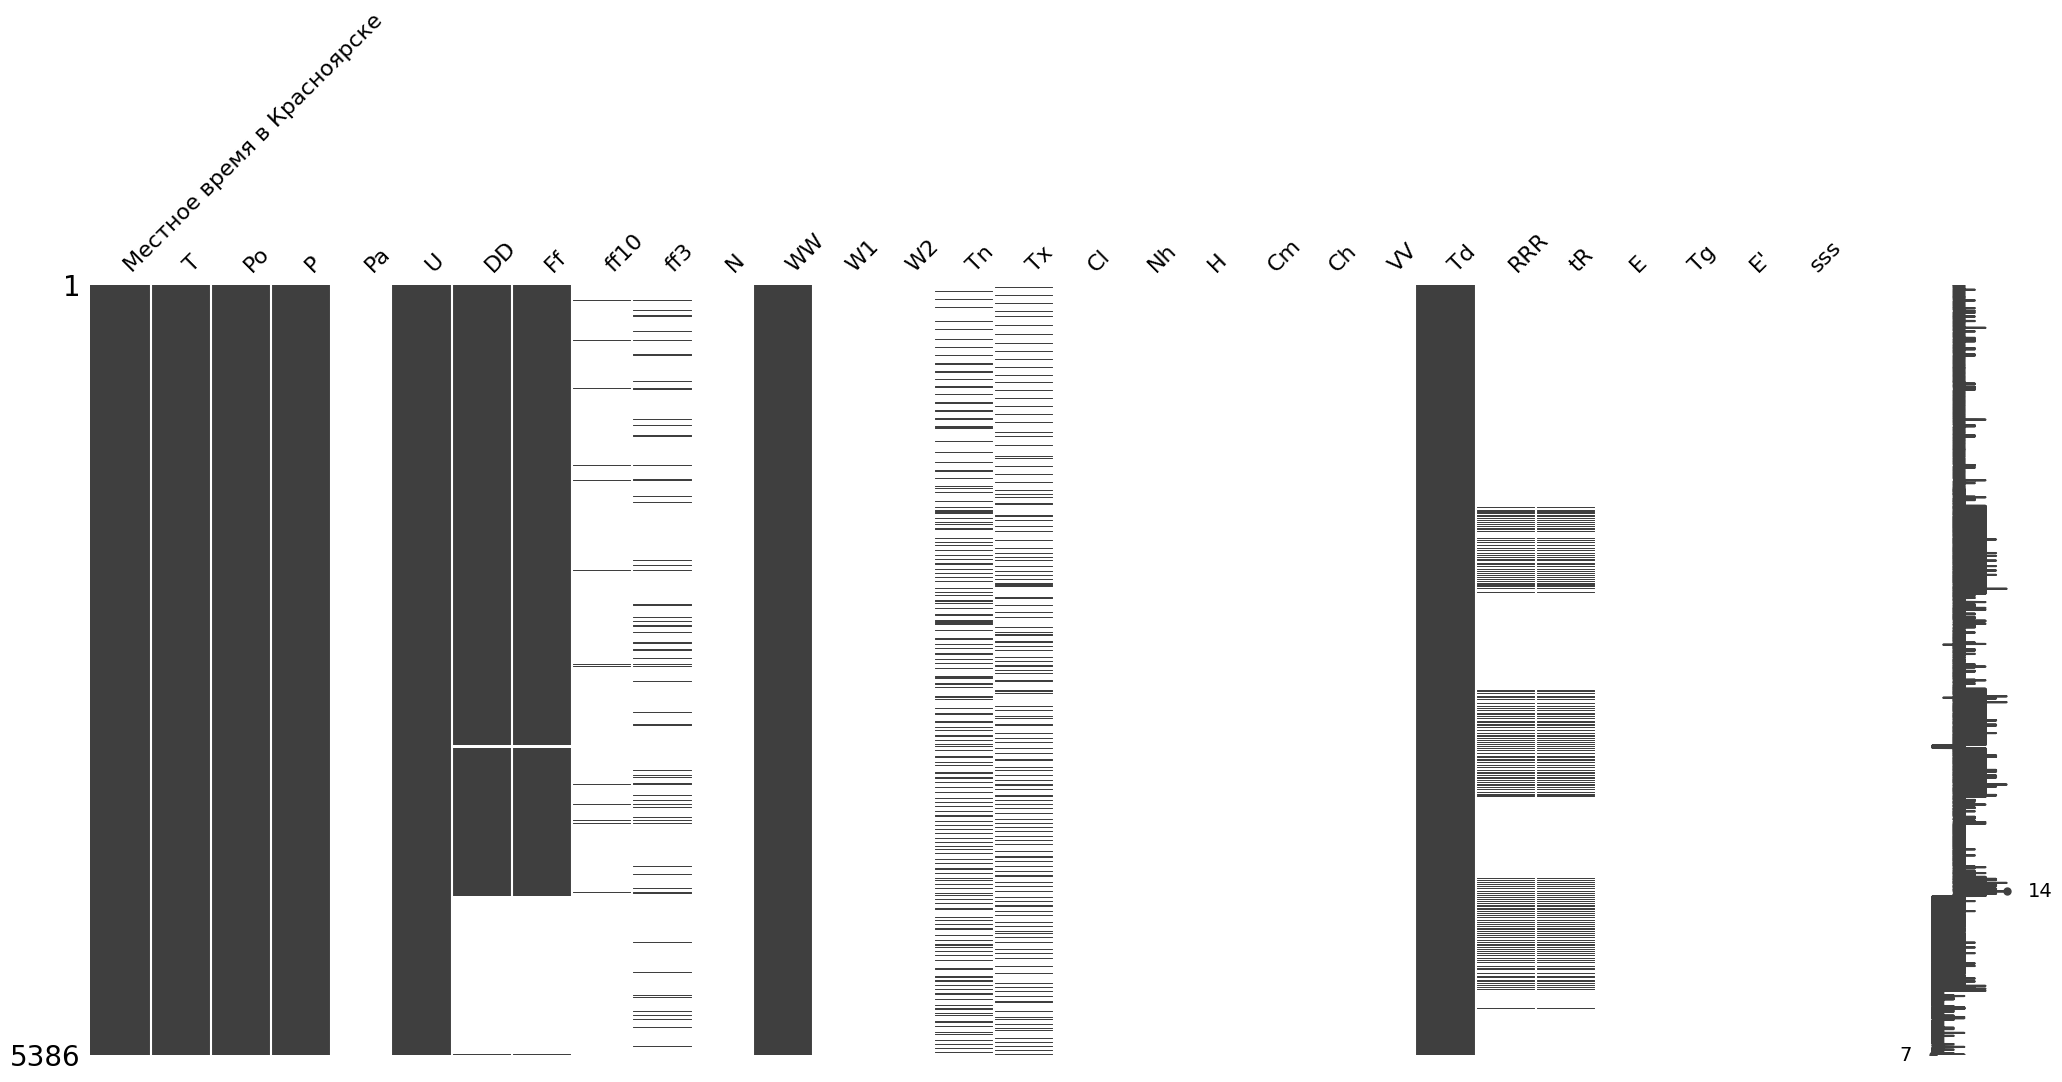

In [24]:
print(missingno.matrix(weather))

In [25]:
columns_to_drop = ['Pa', 'DD', 'Ff', 'ff10', 'ff10','ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'RRR', 'tR', \
                   'E', 'Tg', "E'", 'sss']
weather.drop(columns=columns_to_drop, inplace=True)

- **T**, температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли
- **P0**, атмосферное давление на уровне станции (миллиметры ртутного столба)
- **P**, атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)
- **U**, относительная влажность (%) на высоте 2 метра над поверхностью земли
- **Td**, температура точки росы на высоте 2 метра над поверхностью земли (градусы цельсия)
- **RRR**, количество выпавших осадков (миллиметры)

In [43]:
weather.head(10)

,date,T,Po,P,U,Td
0,2021-01-01,-12.025,754.550,773.100,72.75,-16.125
1,2021-01-02,-27.650,768.100,788.250,77.75,-30.325
2,2021-01-03,-24.750,769.750,789.625,77.50,-27.550
3,2021-01-04,-22.150,768.400,788.025,73.75,-25.600
4,2021-01-05,-24.850,776.250,796.225,67.50,-29.175
5,2021-01-06,-20.350,773.425,793.125,71.25,-24.250
6,2021-01-07,-21.250,771.325,791.000,75.00,-24.575
7,2021-01-08,-23.850,767.750,787.550,80.75,-26.250
8,2021-01-09,-20.050,761.575,780.900,80.25,-22.700
9,2021-01-10,-11.425,752.600,771.100,76.25,-14.850


In [27]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5386 entries, 0 to 5385
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Местное время в Красноярске  5386 non-null   object 
 1   T                            5384 non-null   float64
 2   Po                           5386 non-null   float64
 3   P                            5386 non-null   float64
 4   U                            5386 non-null   int64  
 5   Td                           5386 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 252.6+ KB


## Индексы строк с пропущенным значением температуры

In [28]:
nan_indices = weather.index[weather.isna().any(axis=1)].tolist() 
nan_indices

[2515, 2886]

In [29]:
weather[2514:2517 ]

,Местное время в Красноярске,T,Po,P,U,Td
2514,26.01.2023 07:00,-17.3,751.9,770.8,88,-18.8
2515,26.01.2023 01:00,NaN,754.3,773.4,77,-22.4
2516,25.01.2023 19:00,-13.2,752.9,771.5,73,-17.0


In [30]:
weather[2885:2888 ]

,Местное время в Красноярске,T,Po,P,U,Td
2885,20.10.2022 07:00,1.8,750.3,767.8,93,0.7
2886,20.10.2022 01:00,NaN,750.1,767.5,98,0.9
2887,19.10.2022 19:00,3.9,748.2,765.5,85,1.6


## Заполним 2 пропуска температуры предыдущим значением

In [31]:
weather['T'] = weather['T'].fillna(-17.3, limit=1)
weather['T'] = weather['T'].fillna(1.8, limit=1)

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5386 entries, 0 to 5385
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Местное время в Красноярске  5386 non-null   object 
 1   T                            5386 non-null   float64
 2   Po                           5386 non-null   float64
 3   P                            5386 non-null   float64
 4   U                            5386 non-null   int64  
 5   Td                           5386 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 252.6+ KB


In [33]:
weather['Местное время в Красноярске'] = pd.to_datetime(weather['Местное время в Красноярске'], dayfirst=True)

In [34]:
weather

,Местное время в Красноярске,T,Po,P,U,Td
0,2024-05-12 22:00:00,15.9,749.0,765.7,22,-5.7
1,2024-05-12 19:00:00,18.6,747.9,764.3,27,-0.8
2,2024-05-12 16:00:00,18.4,748.4,764.8,23,-3.2
3,2024-05-12 13:00:00,17.6,749.4,765.9,18,-6.9
4,2024-05-12 10:00:00,12.9,749.2,766.0,27,-5.7
...,...,...,...,...,...,...
5381,2021-01-02 01:00:00,-26.6,766.4,786.4,80,-29.0
5382,2021-01-01 19:00:00,-9.2,751.2,769.5,68,-14.1
5383,2021-01-01 13:00:00,-8.5,751.8,770.0,62,-14.5
5384,2021-01-01 07:00:00,-11.2,754.0,772.5,73,-15.2


In [35]:
weather['date'] = weather['Местное время в Красноярске'].dt.date
weather

,Местное время в Красноярске,T,Po,P,U,Td,date
0,2024-05-12 22:00:00,15.9,749.0,765.7,22,-5.7,2024-05-12
1,2024-05-12 19:00:00,18.6,747.9,764.3,27,-0.8,2024-05-12
2,2024-05-12 16:00:00,18.4,748.4,764.8,23,-3.2,2024-05-12
3,2024-05-12 13:00:00,17.6,749.4,765.9,18,-6.9,2024-05-12
4,2024-05-12 10:00:00,12.9,749.2,766.0,27,-5.7,2024-05-12
...,...,...,...,...,...,...,...
5381,2021-01-02 01:00:00,-26.6,766.4,786.4,80,-29.0,2021-01-02
5382,2021-01-01 19:00:00,-9.2,751.2,769.5,68,-14.1,2021-01-01
5383,2021-01-01 13:00:00,-8.5,751.8,770.0,62,-14.5,2021-01-01
5384,2021-01-01 07:00:00,-11.2,754.0,772.5,73,-15.2,2021-01-01


In [36]:
weather = weather.groupby('date').agg({
    'T': 'mean',
    'Po': 'mean',
    'P': 'mean',
    'U': 'mean',
    'Td': 'mean'
}).reset_index()

In [37]:
weather

,date,T,Po,P,U,Td
0,2021-01-01,-12.0250,754.5500,773.100,72.750,-16.1250
1,2021-01-02,-27.6500,768.1000,788.250,77.750,-30.3250
2,2021-01-03,-24.7500,769.7500,789.625,77.500,-27.5500
3,2021-01-04,-22.1500,768.4000,788.025,73.750,-25.6000
4,2021-01-05,-24.8500,776.2500,796.225,67.500,-29.1750
...,...,...,...,...,...,...
1218,2024-05-08,12.4625,745.4375,762.150,37.750,-3.1125
1219,2024-05-09,12.2500,749.0375,765.875,34.375,-3.8375
1220,2024-05-10,13.9125,745.5750,762.225,35.875,-3.4125
1221,2024-05-11,19.4625,740.2750,756.475,40.625,5.2000


In [39]:
water_level = pd.read_csv('../data/water_level.csv', sep=';', names=['date', 'water_level'])

In [40]:
water_level

,date,water_level
0,01.01.2021,170
1,02.01.2021,-1
2,03.01.2021,173
3,04.01.2021,173
4,05.01.2021,173
...,...,...
1223,08.05.2024,201
1224,09.05.2024,200
1225,10.05.2024,197
1226,11.05.2024,196


In [42]:
weather['date'] = pd.to_datetime(weather['date'])

In [44]:
water_level['date'] = pd.to_datetime(water_level['date'], dayfirst=True)

In [45]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1223 non-null   datetime64[ns]
 1   T       1223 non-null   float64       
 2   Po      1223 non-null   float64       
 3   P       1223 non-null   float64       
 4   U       1223 non-null   float64       
 5   Td      1223 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 57.5 KB


In [46]:
water_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1228 non-null   datetime64[ns]
 1   water_level  1228 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.3 KB


In [49]:
water_level['water_level'] = water_level['water_level'].replace(-1, np.nan)

In [50]:
df = weather.merge(water_level, on='date', how='outer')

In [51]:
df

,date,T,Po,P,U,Td,water_level
0,2021-01-01,-12.0250,754.5500,773.100,72.750,-16.1250,170.0
1,2021-01-02,-27.6500,768.1000,788.250,77.750,-30.3250,NaN
2,2021-01-03,-24.7500,769.7500,789.625,77.500,-27.5500,173.0
3,2021-01-04,-22.1500,768.4000,788.025,73.750,-25.6000,173.0
4,2021-01-05,-24.8500,776.2500,796.225,67.500,-29.1750,173.0
...,...,...,...,...,...,...,...
1223,2024-05-08,12.4625,745.4375,762.150,37.750,-3.1125,201.0
1224,2024-05-09,12.2500,749.0375,765.875,34.375,-3.8375,200.0
1225,2024-05-10,13.9125,745.5750,762.225,35.875,-3.4125,197.0
1226,2024-05-11,19.4625,740.2750,756.475,40.625,5.2000,196.0


## Образовались пропуски в признаках, не для каждого дня были данные о погоде

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1228 non-null   datetime64[ns]
 1   T            1223 non-null   float64       
 2   Po           1223 non-null   float64       
 3   P            1223 non-null   float64       
 4   U            1223 non-null   float64       
 5   Td           1223 non-null   float64       
 6   water_level  1155 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.3 KB


## Заполнение пропусков с помощью линейной интерполяции

In [53]:
import matplotlib.pyplot as plt

In [54]:
start_date = '2023-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

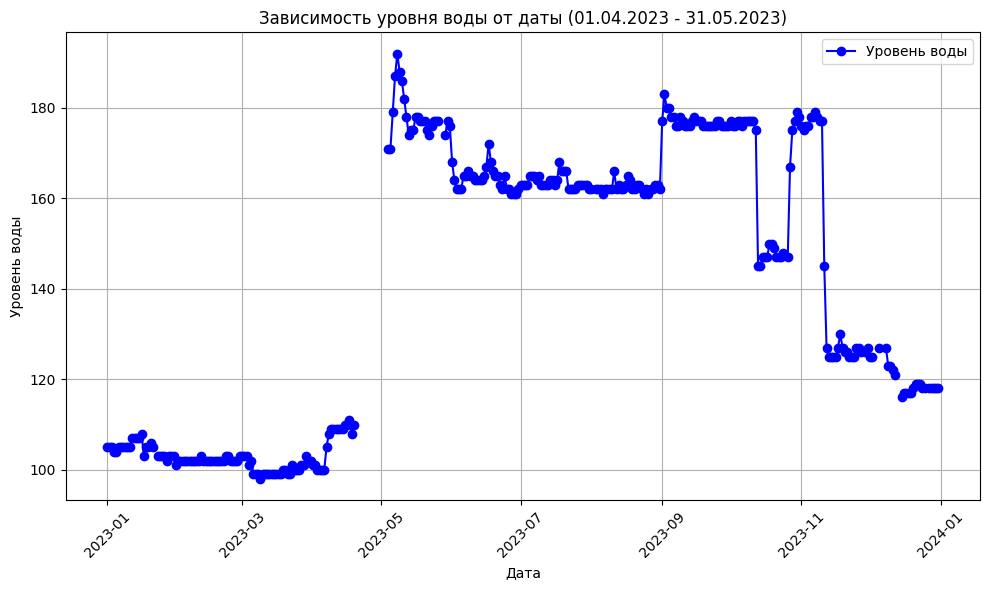

In [55]:
plt.figure(figsize=(10, 6))  
plt.plot(filtered_df['date'], filtered_df['water_level'], marker='o', linestyle='-', color='b', label='Уровень воды')
plt.title('Зависимость уровня воды от даты (01.04.2023 - 31.05.2023)') 
plt.xlabel('Дата')  
plt.ylabel('Уровень воды')  
plt.grid(True) 
plt.legend()  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [56]:
df = df.interpolate(method='linear')

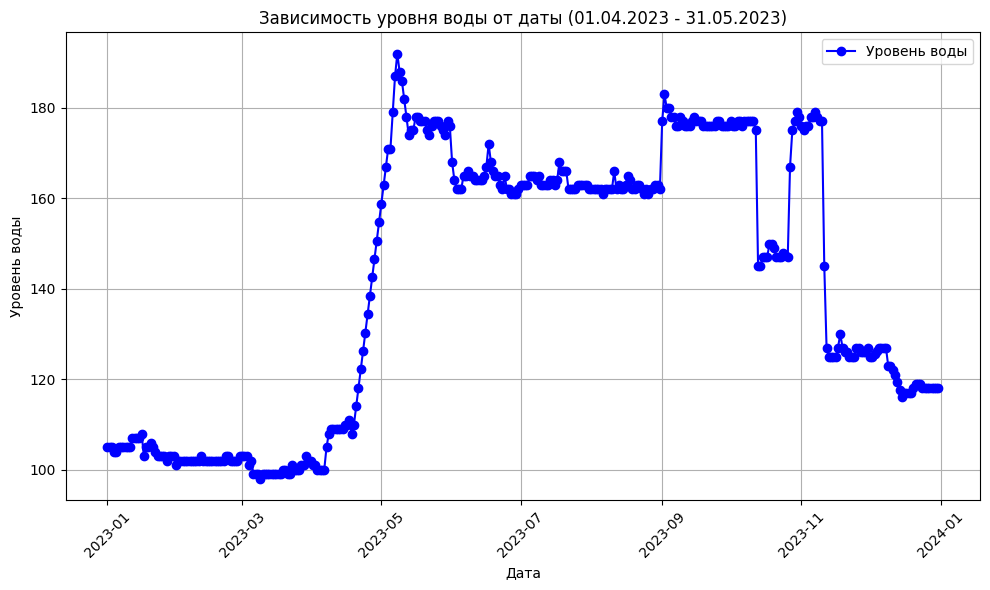

In [57]:
start_date = '2023-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

  
plt.figure(figsize=(10, 6))  
plt.plot(filtered_df['date'], filtered_df['water_level'], marker='o', linestyle='-', color='b', label='Уровень воды')
plt.title('Зависимость уровня воды от даты (01.04.2023 - 31.05.2023)')  
plt.xlabel('Дата') 
plt.ylabel('Уровень воды')  
plt.grid(True) 
plt.legend() 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [183]:
df

,date,T,Po,P,U,Td,water_level
0,2021-01-01,-12.0250,754.5500,773.100,72.750,-16.1250,170.0
1,2021-01-02,-27.6500,768.1000,788.250,77.750,-30.3250,171.5
2,2021-01-03,-24.7500,769.7500,789.625,77.500,-27.5500,173.0
3,2021-01-04,-22.1500,768.4000,788.025,73.750,-25.6000,173.0
4,2021-01-05,-24.8500,776.2500,796.225,67.500,-29.1750,173.0
...,...,...,...,...,...,...,...
1223,2024-05-08,12.4625,745.4375,762.150,37.750,-3.1125,201.0
1224,2024-05-09,12.2500,749.0375,765.875,34.375,-3.8375,200.0
1225,2024-05-10,13.9125,745.5750,762.225,35.875,-3.4125,197.0
1226,2024-05-11,19.4625,740.2750,756.475,40.625,5.2000,196.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1228 non-null   datetime64[ns]
 1   T            1228 non-null   float64       
 2   Po           1228 non-null   float64       
 3   P            1228 non-null   float64       
 4   U            1228 non-null   float64       
 5   Td           1228 non-null   float64       
 6   water_level  1228 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.3 KB


In [184]:
#df['water_level_next_day'] = df['water_level'].shift(-1)

In [ ]:
#df.iloc[-1,-1] = 198

<Axes: >

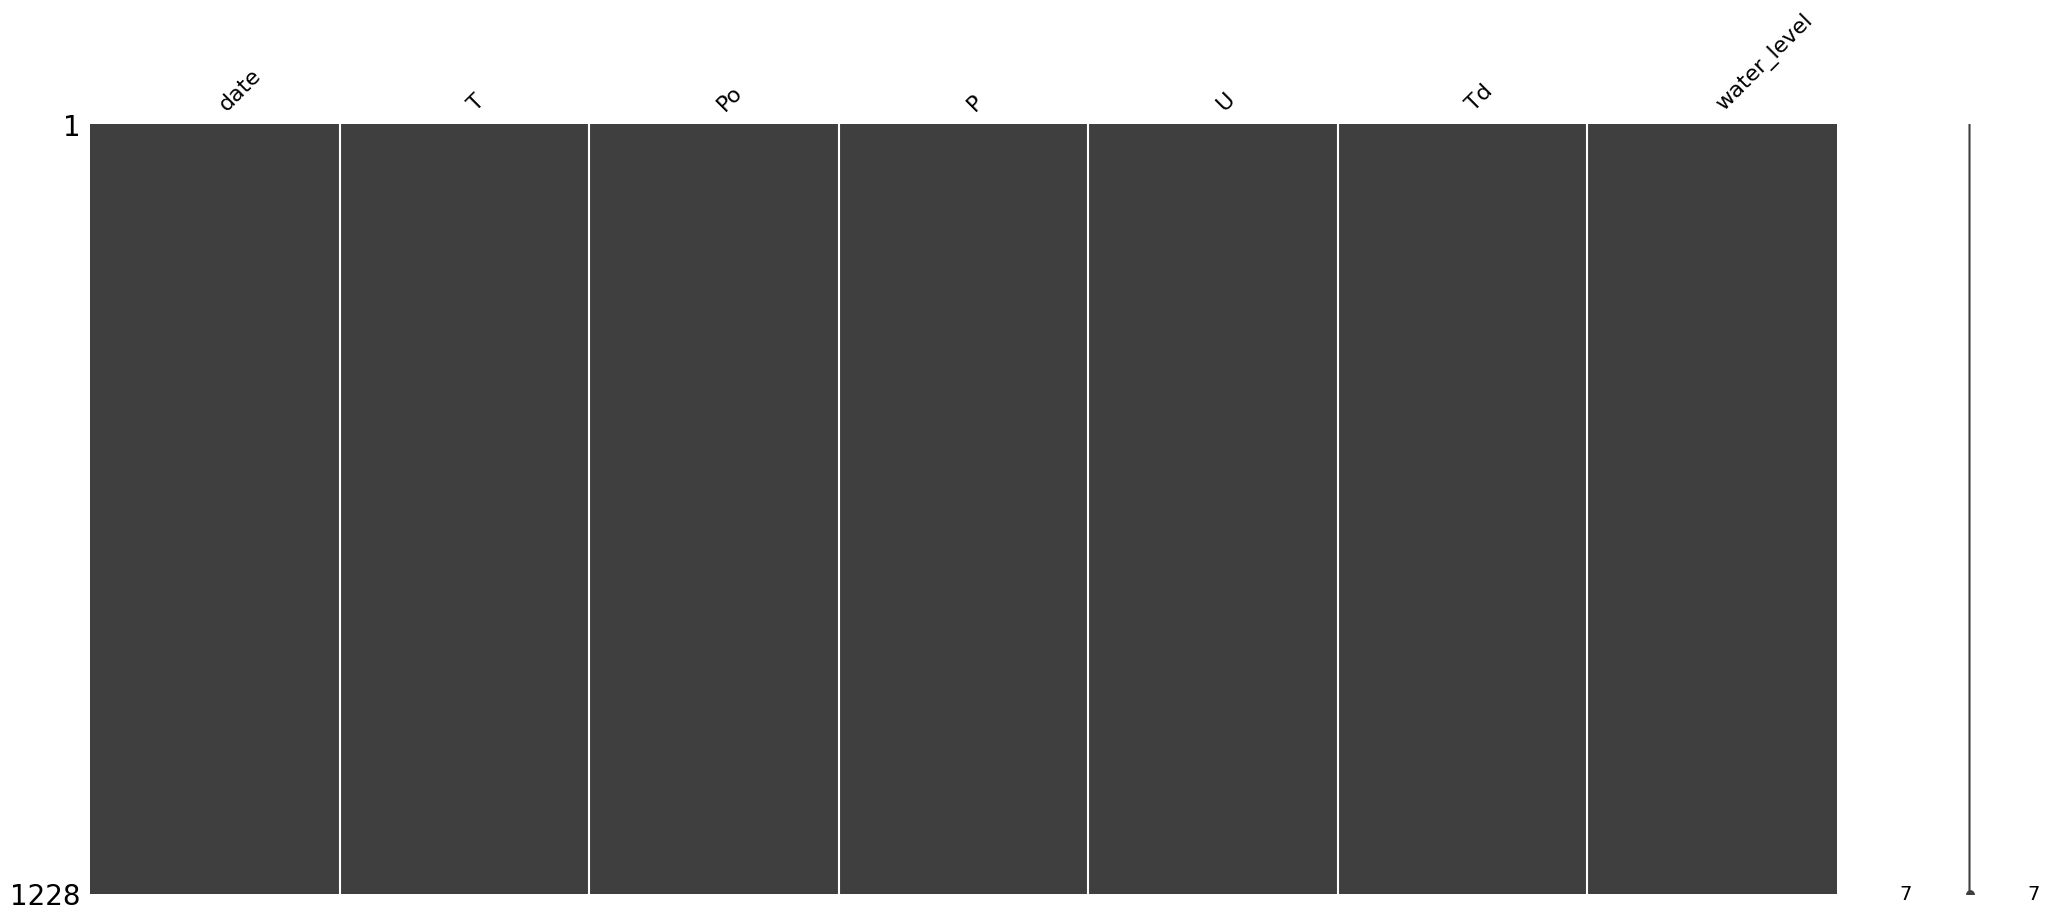

In [60]:
missingno.matrix(df)

In [62]:
df.to_csv('../data/data.csv')